In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
claimants=pd.read_csv("/content/claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
claimants.shape

(1340, 7)

In [4]:
#dropping the case no column as it is not important
claimants.drop(["CASENUM"],inplace=True,axis=1)



In [5]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [6]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [7]:
claimants.dropna(inplace=True)

In [8]:
claimants.shape

(1096, 6)

In [9]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [10]:
# Dividing our data into input and out put variables
x=claimants.iloc[:,1:]#independant variables
y=claimants.iloc[:,0]#dependant variables

In [12]:
x

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1334,1.0,1.0,0.0,16.0,0.060
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [11]:
y

,ATTORNEY
0,0
1,1
2,1
3,0
4,1
...,...
1334,1
1336,0
1337,1
1338,0


In [13]:
# logistics regression and fit the model
classifier=LogisticRegression()#initialize the model i.e, called instance of class object
#first create object 'classifier' for class LogisticRegression
classifier.fit(x,y)
# then use this object to fit the model

LogisticRegression()

In [14]:
# predict for x dataset
y_predict=classifier.predict(x)

In [15]:
y_predict

array([0, 1, 1, ..., 1, 0, 1])

In [16]:
df=pd.DataFrame({"Actual":y,"predicted":y_predict})

In [17]:
df

,Actual,predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [18]:
# confusion matrix for the model accuracy TP  FP
#                                         FN  TF

from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,y_predict)
print(confusion_matrix)

[[381 197]
 [123 395]]


In [19]:
(381+395)/(381+197+123+395) # accuracy

0.708029197080292

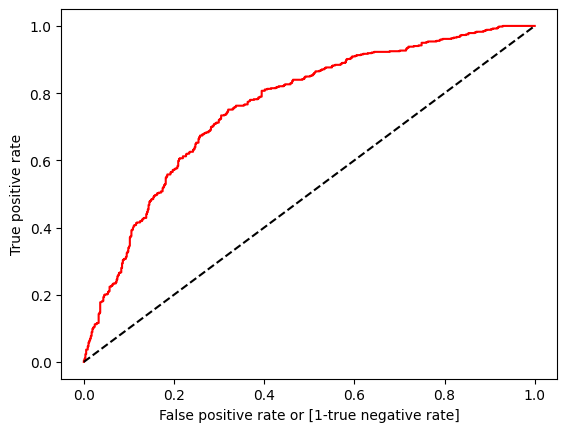

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, threshoulds =roc_curve(y,classifier.predict_proba(x)[:,1])
#we want to predict probability values for x data
#predict_proba returns probability estimates for all classes
# and the results are ordered by the label of classes i.e, 0 and 1
# here we will get false positive rate, true positive rate ad threshould values

auc=roc_auc_score(y,y_predict)
# compute roc_auc_score based on y and y predicted

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],'k--')
# x axis range is 0 to 1, y axis range is 0 to 1,k-- is a line type
plt.xlabel("False positive rate or [1-true negative rate]")
plt.ylabel("True positive rate")
plt.show()



In [23]:
auc

0.7108589063606365